**Chapter 2: Integer Programming**

***Developed by Anh Phuong Ngo***

# Question 1

## Problem description

NCAT is considering 4 projects. Project 1 is anticipated to have a net present value (NPV) of 16 million dollars; project 2, an NPV of 22 million dollars; project 3, an NPV of 12 million dollars; and project 4, an NPV of 8 million dollars.
Each project requires an investment: project 1, 5 million dollar; project 2, 7 million dollars; project 3, 4 million dollars; and project 4, 3 million dollars.
Currently, 14 million dollars is available in total for the investment.
NCAT can invest 2 projects at most. Formulate an IP, which maximize the NPV for NCAT.

## Mathematical modelling

### Decision variable:
$$
x_i = \begin{cases}
    1 & \text{if the project i is selected} \\
    0 & \text{otherwise.}
\end{cases},
~~ i={1,2,3,4}
$$ 

### Parameters:
$c_i$: cost of project $i$

$p_i$: profit of project $i$

### Formulation:

$\max z = \sum_{i=1}^4 p_i x_i$

Subject to:

$\sum_{i=1}^4 c_i x_i \leq ~ \text{Total investment} $

Additional constraints

### Substitution:

$\max z = 16x_1 + 22x_2 + 12x_3 + 8x_4$

Subject to:

$5x_1 + 7x_2 + 4x_3 + 3x_4 \leq 14$

$\sum_{i=1}^4 \leq 2$

## Computational modelling

In [2]:
# Check installed solvers
import cvxpy as cvx
print(cvx.installed_solvers())

['CPLEX', 'ECOS', 'ECOS_BB', 'GUROBI', 'MOSEK', 'OSQP', 'SCIPY', 'SCS', 'XPRESS']


In [3]:
# Import packages
import cvxpy as cvx
import pandas as pan
import math
import numpy as np

In [4]:
# Python indexing starts from 0
# Constraints:
constr = []

# Variables:
x1 = cvx.Variable(boolean=True)
x2 = cvx.Variable(boolean=True)
x3 = cvx.Variable(boolean=True)
x4 = cvx.Variable(boolean=True)

# Total investment constraint:
constr += [5*x1 + 7*x2 + 4*x3 + 3*x4 <= 14]

# Can choose 2 projects at most:
constr += [x1 + x2 + x3 + x4 <= 2]

# Objective function:
objf = 16*x1 + 22*x2 + 12*x3 + 8*x4

# Call the solver:
prob = cvx.Problem(cvx.Maximize(objf), constr)
prob.solve(solver = 'ECOS_BB', verbose=True, warm_start=True)

                                     CVXPY                                     
                                     v1.2.1                                    
(CVXPY) May 12 09:34:55 PM: Your problem has 4 variables, 2 constraints, and 0 parameters.
(CVXPY) May 12 09:34:55 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) May 12 09:34:55 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) May 12 09:34:55 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
(CVXPY) May 12 09:34:55 PM: Compiling problem (target solver=ECOS_BB).
(CVXPY) May 12 09:34:55 PM: Reduction chain: FlipObjective -> Dcp2Cone -> CvxAttr2Constr -> Co

38.0000000004307

## Result

In [5]:
print('Project 1 :',x1.value)
print('Project 2 :',x2.value)
print('Project 3 :',x3.value)
print('Project 4 :',x4.value)

Project 1 : 0.9999999997114247
Project 2 : 1.0000000000850255
Project 3 : 3.461665680394948e-10
Project 4 : -1.2208135946753703e-10


***
# Question 2: Airline gate assignment

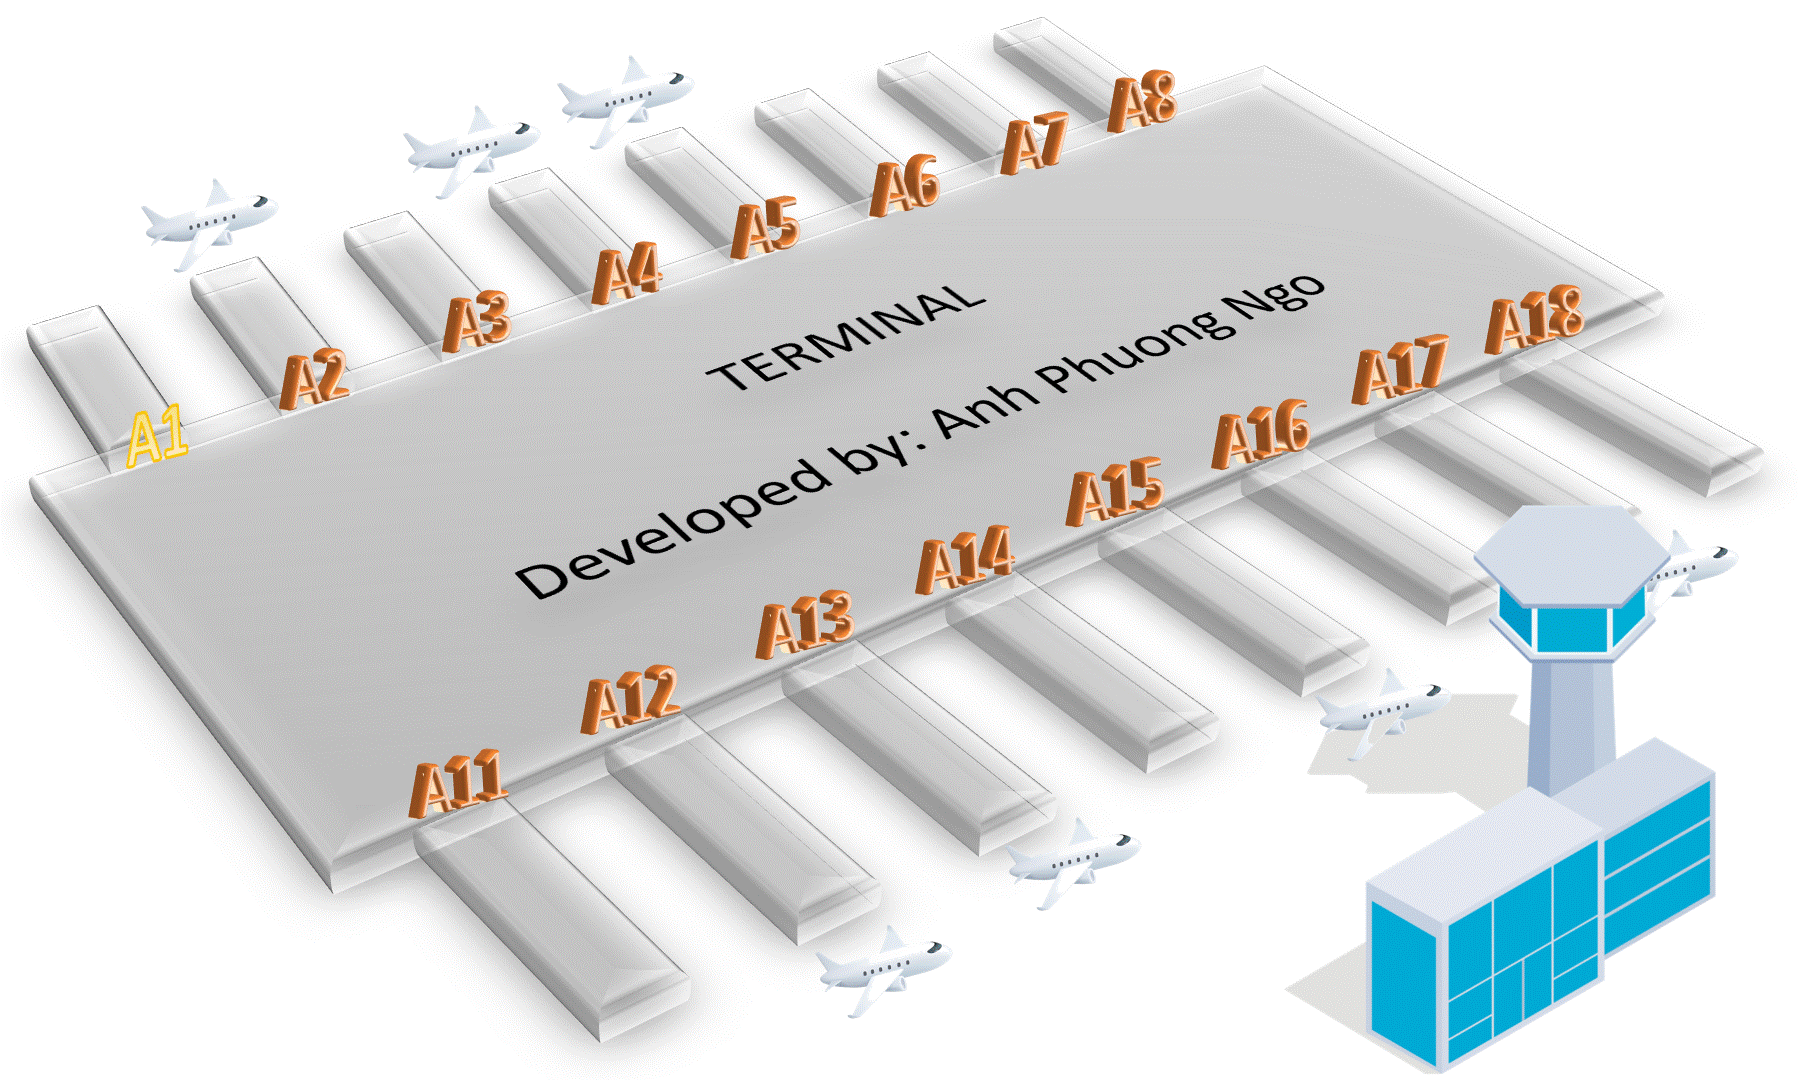

In [6]:
from IPython import display
display.Image("TerminalA.gif", width = 800)

## Problem description

Gate Assignment Problem (GAP) is a crucial aspect of daily airline operations, as it involves scheduling arriving flights to specific gates. To successfully allocate gates, several factors must be taken into account, including passenger walking distances, baggage transfer, ramp congestion, aircraft size, aircraft rotation, and aircraft service requirements. Additionally, flight delays may occur due to weather conditions or events at other airports.

Once a plane arrives at a gate, its scheduled departure time becomes its due date, and its performance is evaluated based on this metric. However, certain tasks must be completed within this time frame, such as deplaning arriving passengers, servicing the plane, and boarding departing passengers.

Baggage handling is another critical process that must be completed before the next flight's departure time, particularly in a hub-and-spoke system where a large volume of baggage and passengers must flow between flights. This involves passengers walking from their arriving gate to their next departure gate, as well as collecting their baggage from the baggage claim area. These points are outlined in various research studies on the subject.

Formulate an Integer Programm, whose objective function is the minimization of the total distance as well as to assign the aircraft to a gate. That total distance covers two parts: 
* Total walking distance of the passenger to their boarding gate.
* The total travel distance of the checked baggage.

A case study is provided (DOI: 10.1063/1.4915875) as follows:

**PASSENGER DATA**

<em><strong>Table 1. Passenger flow from their current flight transferring to another gate for their connecting flight.</strong></em>

<table>
<thead>
  <tr>
    <th rowspan="2">Flight <br>No.</th>
    <th colspan="19">GATE</th>
  </tr>
  <tr>
    <th>1</th>
    <th>2</th>
    <th>3</th>
    <th>4</th>
    <th>5</th>
    <th>6</th>
    <th>7</th>
    <th>8</th>
    <th>9</th>
    <th>10</th>
    <th>11</th>
    <th>12</th>
    <th>13</th>
    <th>14</th>
    <th>15</th>
    <th>16</th>
    <th>17</th>
    <th>18</th>
    <th>19</th>
  </tr>
</thead>
<tbody>
  <tr>
    <td>(F1) AA1120</td>
    <td>5</td>
    <td>5</td>
    <td>10</td>
    <td>8</td>
    <td>15</td>
    <td>8</td>
    <td>2</td>
    <td>10</td>
    <td>8</td>
    <td>20</td>
    <td>5</td>
    <td>4</td>
    <td>0</td>
    <td>9</td>
    <td>3</td>
    <td>4</td>
    <td>1</td>
    <td>2</td>
    <td>1</td>
  </tr>
  <tr>
    <td>(F2) TP8833</td>
    <td>5</td>
    <td>2</td>
    <td>1</td>
    <td>4</td>
    <td>19</td>
    <td>9</td>
    <td>4</td>
    <td>2</td>
    <td>3</td>
    <td>2</td>
    <td>27</td>
    <td>3</td>
    <td>8</td>
    <td>4</td>
    <td>0</td>
    <td>2</td>
    <td>1</td>
    <td>7</td>
    <td>2</td>
  </tr>
  <tr>
    <td>(F3) DE5479</td>
    <td>10</td>
    <td>0</td>
    <td>4</td>
    <td>9</td>
    <td>13</td>
    <td>4</td>
    <td>4</td>
    <td>4</td>
    <td>3</td>
    <td>5</td>
    <td>5</td>
    <td>8</td>
    <td>4</td>
    <td>9</td>
    <td>11</td>
    <td>7</td>
    <td>9</td>
    <td>4</td>
    <td>4</td>
  </tr>
  <tr>
    <td>(F4) VN1596</td>
    <td>4</td>
    <td>8</td>
    <td>5</td>
    <td>4</td>
    <td>10</td>
    <td>4</td>
    <td>1</td>
    <td>0</td>
    <td>0</td>
    <td>2</td>
    <td>4</td>
    <td>19</td>
    <td>1</td>
    <td>2</td>
    <td>4</td>
    <td>5</td>
    <td>5</td>
    <td>8</td>
    <td>2</td>
  </tr>
  <tr>
    <td>(F5) KR1234</td>
    <td>4</td>
    <td>11</td>
    <td>9</td>
    <td>9</td>
    <td>6</td>
    <td>3</td>
    <td>1</td>
    <td>4</td>
    <td>4</td>
    <td>2</td>
    <td>1</td>
    <td>0</td>
    <td>3</td>
    <td>5</td>
    <td>1</td>
    <td>2</td>
    <td>2</td>
    <td>3</td>
    <td>4</td>
  </tr>
  <tr>
    <td>(F6) JP9874</td>
    <td>1</td>
    <td>2</td>
    <td>42</td>
    <td>5</td>
    <td>2</td>
    <td>7</td>
    <td>6</td>
    <td>2</td>
    <td>4</td>
    <td>7</td>
    <td>2</td>
    <td>3</td>
    <td>6</td>
    <td>4</td>
    <td>10</td>
    <td>2</td>
    <td>1</td>
    <td>0</td>
    <td>0</td>
  </tr>
  <tr>
    <td>(F7) PT3388</td>
    <td>3</td>
    <td>3</td>
    <td>2</td>
    <td>5</td>
    <td>9</td>
    <td>13</td>
    <td>11</td>
    <td>2</td>
    <td>2</td>
    <td>3</td>
    <td>7</td>
    <td>22</td>
    <td>4</td>
    <td>0</td>
    <td>1</td>
    <td>1</td>
    <td>2</td>
    <td>2</td>
    <td>9</td>
  </tr>
</tbody>
</table>

<em><strong>Table 2. The distance (in meters) between the arrival gates and the next departure gates. These gates are available ones to be assigned for the incoming landing flights. </strong></em>

<table>
<thead>
  <tr>
    <th rowspan="2">Arrival<br>gate</th>
    <th colspan="19">Boarding gate</th>
  </tr>
  <tr>
    <th>1</th>
    <th>2</th>
    <th>3</th>
    <th>4</th>
    <th>5</th>
    <th>6</th>
    <th>7</th>
    <th>8</th>
    <th>9</th>
    <th>10</th>
    <th>11</th>
    <th>12</th>
    <th>13</th>
    <th>14</th>
    <th>15</th>
    <th>16</th>
    <th>17</th>
    <th>18</th>
    <th>19</th>
  </tr>
</thead>
<tbody>
  <tr>
    <td>3</td>
    <td>10</td>
    <td>40</td>
    <td>0</td>
    <td>30</td>
    <td>10</td>
    <td>40</td>
    <td>20</td>
    <td>50</td>
    <td>30</td>
    <td>60</td>
    <td>40</td>
    <td>70</td>
    <td>50</td>
    <td>80</td>
    <td>60</td>
    <td>90</td>
    <td>70</td>
    <td>90</td>
    <td>80</td>
  </tr>
  <tr>
    <td>4</td>
    <td>40</td>
    <td>10</td>
    <td>30</td>
    <td>0</td>
    <td>40</td>
    <td>10</td>
    <td>50</td>
    <td>20</td>
    <td>60</td>
    <td>30</td>
    <td>70</td>
    <td>40</td>
    <td>80</td>
    <td>50</td>
    <td>90</td>
    <td>60</td>
    <td>90</td>
    <td>70</td>
    <td>80</td>
  </tr>
  <tr>
    <td>10</td>
    <td>70</td>
    <td>40</td>
    <td>60</td>
    <td>30</td>
    <td>50</td>
    <td>20</td>
    <td>40</td>
    <td>10</td>
    <td>30</td>
    <td>0</td>
    <td>40</td>
    <td>10</td>
    <td>50</td>
    <td>40</td>
    <td>60</td>
    <td>30</td>
    <td>70</td>
    <td>40</td>
    <td>50</td>
  </tr>
  <tr>
    <td>11</td>
    <td>50</td>
    <td>80</td>
    <td>40</td>
    <td>70</td>
    <td>30</td>
    <td>60</td>
    <td>20</td>
    <td>50</td>
    <td>10</td>
    <td>40</td>
    <td>0</td>
    <td>30</td>
    <td>10</td>
    <td>40</td>
    <td>20</td>
    <td>50</td>
    <td>30</td>
    <td>50</td>
    <td>40</td>
  </tr>
  <tr>
    <td>14</td>
    <td>90</td>
    <td>60</td>
    <td>80</td>
    <td>50</td>
    <td>70</td>
    <td>40</td>
    <td>60</td>
    <td>30</td>
    <td>50</td>
    <td>20</td>
    <td>40</td>
    <td>10</td>
    <td>30</td>
    <td>0</td>
    <td>40</td>
    <td>10</td>
    <td>50</td>
    <td>20</td>
    <td>30</td>
  </tr>
  <tr>
    <td>15</td>
    <td>70</td>
    <td>100</td>
    <td>60</td>
    <td>90</td>
    <td>50</td>
    <td>80</td>
    <td>40</td>
    <td>70</td>
    <td>30</td>
    <td>60</td>
    <td>20</td>
    <td>50</td>
    <td>10</td>
    <td>40</td>
    <td>0</td>
    <td>30</td>
    <td>10</td>
    <td>30</td>
    <td>20</td>
  </tr>
  <tr>
    <td>17</td>
    <td>80</td>
    <td>100</td>
    <td>70</td>
    <td>90</td>
    <td>60</td>
    <td>80</td>
    <td>50</td>
    <td>70</td>
    <td>40</td>
    <td>60</td>
    <td>30</td>
    <td>50</td>
    <td>20</td>
    <td>40</td>
    <td>10</td>
    <td>30</td>
    <td>0</td>
    <td>20</td>
    <td>10</td>
  </tr>
</tbody>
</table>

<em><strong>Table 3. Travel distance. The table 3 is derived from table 1 and 2 (Tab3 = Tab1 x Tab2).</strong></em>

<table>
<thead>
  <tr>
    <th rowspan="2">Flight</th>
    <th colspan="7">Arrival gate</th>
  </tr>
  <tr>
    <th>3</th>
    <th>4</th>
    <th>10</th>
    <th>11</th>
    <th>14</th>
    <th>15</th>
    <th>17</th>
  </tr>
</thead>
<tbody>
  <tr>
    <td>F1</td>
    <td>5,010</td>
    <td>4,390</td>
    <td>3,820</td>
    <td>4870</td>
    <td>5,060</td>
    <td>6,650</td>
    <td>7,090</td>
  </tr>
  <tr>
    <td>F2</td>
    <td>4,240</td>
    <td>5,290</td>
    <td>4,190</td>
    <td>3020</td>
    <td>4650</td>
    <td>4,400</td>
    <td>4,970</td>
  </tr>
  <tr>
    <td>F3</td>
    <td>5,610</td>
    <td>5,950</td>
    <td>4,930</td>
    <td>4270</td>
    <td>4,910</td>
    <td>4,950</td>
    <td>5,320</td>
  </tr>
  <tr>
    <td>F4</td>
    <td>4,500</td>
    <td>3,990</td>
    <td>3,280</td>
    <td>3580</td>
    <td>3460</td>
    <td>4,320</td>
    <td>4,460</td>
  </tr>
  <tr>
    <td>F5</td>
    <td>2,950</td>
    <td>2,720</td>
    <td>3,060</td>
    <td>3490</td>
    <td>3,620</td>
    <td>4,330</td>
    <td>4,530</td>
  </tr>
  <tr>
    <td>F6</td>
    <td>3,060</td>
    <td>4,310</td>
    <td>4,740</td>
    <td>3900</td>
    <td>5760</td>
    <td>5,300</td>
    <td>6,020</td>
  </tr>
  <tr>
    <td>F7</td>
    <td>4,680</td>
    <td>4,380</td>
    <td>3,290</td>
    <td>3620</td>
    <td>3970</td>
    <td>4,960</td>
    <td>5,220</td>
  </tr>
</tbody>
</table>

**BAGGAGE DATA**

<em><strong>Table 4. Baggage flow from its current flight transferring to another gate for its connecting flight.</strong></em>

<table>
<thead>
  <tr>
    <th rowspan="2">Flight</th>
    <th colspan="19">Boarding gate</th>
  </tr>
  <tr>
    <th>1</th>
    <th>2</th>
    <th>3</th>
    <th>4</th>
    <th>5</th>
    <th>6</th>
    <th>7</th>
    <th>8</th>
    <th>9</th>
    <th>10</th>
    <th>11</th>
    <th>12</th>
    <th>13</th>
    <th>14</th>
    <th>15</th>
    <th>16</th>
    <th>17</th>
    <th>18</th>
    <th>19</th>
  </tr>
</thead>
<tbody>
  <tr>
    <td>F1</td>
    <td>19</td>
    <td>28</td>
    <td>11</td>
    <td>8</td>
    <td>30</td>
    <td>25</td>
    <td>33</td>
    <td>5</td>
    <td>49</td>
    <td>14</td>
    <td>38</td>
    <td>38</td>
    <td>14</td>
    <td>23</td>
    <td>17</td>
    <td>4</td>
    <td>20</td>
    <td>44</td>
    <td>8</td>
  </tr>
  <tr>
    <td>F2</td>
    <td>43</td>
    <td>40</td>
    <td>22</td>
    <td>29</td>
    <td>4</td>
    <td>49</td>
    <td>8</td>
    <td>6</td>
    <td>20</td>
    <td>21</td>
    <td>17</td>
    <td>5</td>
    <td>27</td>
    <td>29</td>
    <td>29</td>
    <td>40</td>
    <td>42</td>
    <td>34</td>
    <td>25</td>
  </tr>
  <tr>
    <td>F3</td>
    <td>22</td>
    <td>17</td>
    <td>36</td>
    <td>45</td>
    <td>22</td>
    <td>28</td>
    <td>17</td>
    <td>23</td>
    <td>18</td>
    <td>44</td>
    <td>12</td>
    <td>8</td>
    <td>41</td>
    <td>48</td>
    <td>25</td>
    <td>11</td>
    <td>27</td>
    <td>47</td>
    <td>28</td>
  </tr>
  <tr>
    <td>F4</td>
    <td>47</td>
    <td>11</td>
    <td>4</td>
    <td>26</td>
    <td>16</td>
    <td>21</td>
    <td>24</td>
    <td>8</td>
    <td>45</td>
    <td>22</td>
    <td>45</td>
    <td>20</td>
    <td>14</td>
    <td>22</td>
    <td>32</td>
    <td>32</td>
    <td>9</td>
    <td>39</td>
    <td>7</td>
  </tr>
  <tr>
    <td>F5</td>
    <td>3</td>
    <td>24</td>
    <td>46</td>
    <td>38</td>
    <td>48</td>
    <td>7</td>
    <td>24</td>
    <td>33</td>
    <td>29</td>
    <td>43</td>
    <td>7</td>
    <td>21</td>
    <td>45</td>
    <td>47</td>
    <td>28</td>
    <td>11</td>
    <td>17</td>
    <td>3</td>
    <td>23</td>
  </tr>
  <tr>
    <td>F6</td>
    <td>9</td>
    <td>47</td>
    <td>18</td>
    <td>3</td>
    <td>44</td>
    <td>14</td>
    <td>4</td>
    <td>27</td>
    <td>34</td>
    <td>38</td>
    <td>17</td>
    <td>26</td>
    <td>2</td>
    <td>3</td>
    <td>28</td>
    <td>40</td>
    <td>11</td>
    <td>8</td>
    <td>46</td>
  </tr>
  <tr>
    <td>F7</td>
    <td>46</td>
    <td>34</td>
    <td>48</td>
    <td>42</td>
    <td>26</td>
    <td>12</td>
    <td>40</td>
    <td>49</td>
    <td>18</td>
    <td>36</td>
    <td>24</td>
    <td>6</td>
    <td>18</td>
    <td>9</td>
    <td>2</td>
    <td>10</td>
    <td>14</td>
    <td>47</td>
    <td>9</td>
  </tr>
</tbody>
</table>

<em><strong>Table 5. Number of trips (baggage) from its current flight transferring to another gate for its connecting flight. Assume the capacity of Ramp storage on trailer is 5, Tab5 = Tab4/5</strong></em>

<table>
<thead>
  <tr>
    <th rowspan="2">Flight</th>
    <th colspan="19">Boarding gate</th>
  </tr>
  <tr>
    <th>1</th>
    <th>2</th>
    <th>3</th>
    <th>4</th>
    <th>5</th>
    <th>6</th>
    <th>7</th>
    <th>8</th>
    <th>9</th>
    <th>10</th>
    <th>11</th>
    <th>12</th>
    <th>13</th>
    <th>14</th>
    <th>15</th>
    <th>16</th>
    <th>17</th>
    <th>18</th>
    <th>19</th>
  </tr>
</thead>
<tbody>
  <tr>
    <td>F1</td>
    <td>4</td>
    <td>6</td>
    <td>3</td>
    <td>2</td>
    <td>6</td>
    <td>5</td>
    <td>7</td>
    <td>1</td>
    <td>10</td>
    <td>3</td>
    <td>8</td>
    <td>8</td>
    <td>3</td>
    <td>5</td>
    <td>4</td>
    <td>1</td>
    <td>4</td>
    <td>9</td>
    <td>2</td>
  </tr>
  <tr>
    <td>F2</td>
    <td>9</td>
    <td>8</td>
    <td>5</td>
    <td>6</td>
    <td>1</td>
    <td>10</td>
    <td>2</td>
    <td>2</td>
    <td>4</td>
    <td>5</td>
    <td>4</td>
    <td>1</td>
    <td>6</td>
    <td>6</td>
    <td>6</td>
    <td>8</td>
    <td>9</td>
    <td>7</td>
    <td>5</td>
  </tr>
  <tr>
    <td>F3</td>
    <td>5</td>
    <td>4</td>
    <td>8</td>
    <td>9</td>
    <td>5</td>
    <td>6</td>
    <td>4</td>
    <td>5</td>
    <td>4</td>
    <td>9</td>
    <td>3</td>
    <td>2</td>
    <td>9</td>
    <td>10</td>
    <td>5</td>
    <td>3</td>
    <td>6</td>
    <td>10</td>
    <td>6</td>
  </tr>
  <tr>
    <td>F4</td>
    <td>10</td>
    <td>3</td>
    <td>1</td>
    <td>6</td>
    <td>4</td>
    <td>5</td>
    <td>5</td>
    <td>2</td>
    <td>9</td>
    <td>5</td>
    <td>9</td>
    <td>4</td>
    <td>3</td>
    <td>5</td>
    <td>7</td>
    <td>7</td>
    <td>2</td>
    <td>8</td>
    <td>2</td>
  </tr>
  <tr>
    <td>F5</td>
    <td>I</td>
    <td>5</td>
    <td>10</td>
    <td>8</td>
    <td>10</td>
    <td>2</td>
    <td>5</td>
    <td>7</td>
    <td>6</td>
    <td>9</td>
    <td>2</td>
    <td>5</td>
    <td>9</td>
    <td>10</td>
    <td>6</td>
    <td>3</td>
    <td>4</td>
    <td>1</td>
    <td>5</td>
  </tr>
  <tr>
    <td>F6</td>
    <td>2</td>
    <td>10</td>
    <td>4</td>
    <td>1</td>
    <td>9</td>
    <td>3</td>
    <td>1</td>
    <td>6</td>
    <td>7</td>
    <td>8</td>
    <td>4</td>
    <td>6</td>
    <td>1</td>
    <td>1</td>
    <td>6</td>
    <td>8</td>
    <td>3</td>
    <td>2</td>
    <td>10</td>
  </tr>
  <tr>
    <td>F7</td>
    <td>10</td>
    <td>7</td>
    <td>10</td>
    <td>9</td>
    <td>6</td>
    <td>3</td>
    <td>8</td>
    <td>10</td>
    <td>4</td>
    <td>8</td>
    <td>5</td>
    <td>2</td>
    <td>4</td>
    <td>2</td>
    <td>1</td>
    <td>2</td>
    <td>3</td>
    <td>10</td>
    <td>2</td>
  </tr>
</tbody>
</table>

<em><strong>Table 6. Distance matrix between arrival gates and boarding gates. Note that: the baggage is conveyed on the trailer, so distance matrix of baggage is different from that of passengers</strong></em>

<table>
<thead>
  <tr>
    <th rowspan="2">Arrival<br>gate</th>
    <th colspan="19">Boarding gate</th>
  </tr>
  <tr>
    <th>1</th>
    <th>2</th>
    <th>3</th>
    <th>4</th>
    <th>5</th>
    <th>6</th>
    <th>7</th>
    <th>8</th>
    <th>9</th>
    <th>10</th>
    <th>11</th>
    <th>12</th>
    <th>13</th>
    <th>14</th>
    <th>15</th>
    <th>16</th>
    <th>17</th>
    <th>18</th>
    <th>19</th>
  </tr>
</thead>
<tbody>
  <tr>
    <td>3</td>
    <td>15</td>
    <td>60</td>
    <td>0</td>
    <td>45</td>
    <td>15</td>
    <td>60</td>
    <td>30</td>
    <td>75</td>
    <td>45</td>
    <td>90</td>
    <td>60</td>
    <td>105</td>
    <td>75</td>
    <td>120</td>
    <td>90</td>
    <td>135</td>
    <td>105</td>
    <td>135</td>
    <td>120</td>
  </tr>
  <tr>
    <td>4</td>
    <td>68</td>
    <td>17</td>
    <td>51</td>
    <td>0</td>
    <td>68</td>
    <td>17</td>
    <td>85</td>
    <td>34</td>
    <td>102</td>
    <td>51</td>
    <td>119</td>
    <td>68</td>
    <td>136</td>
    <td>85</td>
    <td>153</td>
    <td>102</td>
    <td>153</td>
    <td>119</td>
    <td>136</td>
  </tr>
  <tr>
    <td>10</td>
    <td>112</td>
    <td>64</td>
    <td>96</td>
    <td>48</td>
    <td>80</td>
    <td>32</td>
    <td>64</td>
    <td>16</td>
    <td>48</td>
    <td>0</td>
    <td>64</td>
    <td>16</td>
    <td>80</td>
    <td>64</td>
    <td>96</td>
    <td>48</td>
    <td>112</td>
    <td>64</td>
    <td>80</td>
  </tr>
  <tr>
    <td>11</td>
    <td>65</td>
    <td>104</td>
    <td>52</td>
    <td>91</td>
    <td>39</td>
    <td>78</td>
    <td>26</td>
    <td>65</td>
    <td>13</td>
    <td>52</td>
    <td>0</td>
    <td>39</td>
    <td>13</td>
    <td>52</td>
    <td>26</td>
    <td>65</td>
    <td>39</td>
    <td>65</td>
    <td>52</td>
  </tr>
  <tr>
    <td>14</td>
    <td>135</td>
    <td>90</td>
    <td>120</td>
    <td>75</td>
    <td>105</td>
    <td>60</td>
    <td>90</td>
    <td>45</td>
    <td>75</td>
    <td>30</td>
    <td>60</td>
    <td>15</td>
    <td>45</td>
    <td>0</td>
    <td>60</td>
    <td>15</td>
    <td>75</td>
    <td>30</td>
    <td>45</td>
  </tr>
  <tr>
    <td>15</td>
    <td>98</td>
    <td>140</td>
    <td>84</td>
    <td>126</td>
    <td>70</td>
    <td>112</td>
    <td>56</td>
    <td>98</td>
    <td>42</td>
    <td>84</td>
    <td>28</td>
    <td>70</td>
    <td>14</td>
    <td>56</td>
    <td>0</td>
    <td>42</td>
    <td>14</td>
    <td>42</td>
    <td>28</td>
  </tr>
  <tr>
    <td>17</td>
    <td>112</td>
    <td>140</td>
    <td>98</td>
    <td>126</td>
    <td>84</td>
    <td>112</td>
    <td>710</td>
    <td>98</td>
    <td>56</td>
    <td>84</td>
    <td>42</td>
    <td>70</td>
    <td>28</td>
    <td>56</td>
    <td>14</td>
    <td>42</td>
    <td>0</td>
    <td>28</td>
    <td>14</td>
  </tr>
</tbody>
</table>

<em><strong>Table 7. Travel distance for baggage. Tab7 = Tab6 x Tab 4 </strong></em>

<table>
<thead>
  <tr>
    <th rowspan="2">Arrival<br>gate</th>
    <th colspan="7">Arrival gate</th>
  </tr>
  <tr>
    <th>3</th>
    <th>4</th>
    <th>10</th>
    <th>11</th>
    <th>14</th>
    <th>15</th>
    <th>17</th>
  </tr>
</thead>
<tbody>
  <tr>
    <td>F1</td>
    <td>6,420</td>
    <td>7,820</td>
    <td>5,616</td>
    <td>4004</td>
    <td>5685</td>
    <td>5,516</td>
    <td>5,936</td>
  </tr>
  <tr>
    <td>F2</td>
    <td>7,965</td>
    <td>8,636</td>
    <td>6,992</td>
    <td>5707</td>
    <td>6525</td>
    <td>6,762</td>
    <td>6,986</td>
  </tr>
  <tr>
    <td>F3</td>
    <td>8,460</td>
    <td>9,197</td>
    <td>7,136</td>
    <td>5824</td>
    <td>6690</td>
    <td>7,224</td>
    <td>7,518</td>
  </tr>
  <tr>
    <td>F4</td>
    <td>7,005</td>
    <td>8,296</td>
    <td>6,064</td>
    <td>4537</td>
    <td>6015</td>
    <td>5,922</td>
    <td>6,426</td>
  </tr>
  <tr>
    <td>F5</td>
    <td>7,320</td>
    <td>8,398</td>
    <td>6,560</td>
    <td>5174</td>
    <td>6600</td>
    <td>7,000</td>
    <td>7,546</td>
  </tr>
  <tr>
    <td>F6</td>
    <td>6,975</td>
    <td>7,480</td>
    <td>5,328</td>
    <td>4719</td>
    <td>5565</td>
    <td>5,978</td>
    <td>6,244</td>
  </tr>
  <tr>
    <td>F7</td>
    <td>6,450</td>
    <td>7,327</td>
    <td>6,528</td>
    <td>5772</td>
    <td>7590</td>
    <td>8,008</td>
    <td>8,470</td>
  </tr>
</tbody>
</table>

## Mathematical modelling

### Indices and Set:
$i$ Index for arriving flights $F$

$j$ Index for gates $G$

$k$ Index for departure gates $K$

### Decision variable:
$$
x_{i,j} = \begin{cases}
    1 & \text{if flight i is assigned to gate j} \\
    0 & \text{otherwise.}
\end{cases}
$$ 

### Parameters:
$P_{i,j}$: Total walking distance for all passengers on flight $i$ assigned to arrival gate $j$.

$B_{i,j}$: Total transport distance for all baggage on flight $i$ assigned to arrival gate $j$.

$w_{pax}$ Weight assigned to total passenger walking distances. 

$w_{bag}$ Weight assigned to total baggage transport distances.

### Formulation:

$\min z = \sum_{i \in F} \sum_{j \in G}$

Subject to:

$\sum_{j \in G} x_{i,j} = 1, ~~ \forall i \in F$ (Force one flight to be assigned to one gate only)

$\sum_{i \in F} x_{i,j} = 1, ~~ \forall j \in G$ (Force one gate only recieves one flight)

## Computational modelling

In [7]:
# Check installed solvers
import cvxpy as cvx
print(cvx.installed_solvers())

['CPLEX', 'ECOS', 'ECOS_BB', 'GUROBI', 'MOSEK', 'OSQP', 'SCIPY', 'SCS', 'XPRESS']


In [8]:
# Import packages
import cvxpy as cvx
import pandas as pan
import math
import numpy as np

In [9]:
# Data from table 3: total distance of passengers from arrival gate to boarding gate

P = np.array([[5010, 4390, 3820, 4870, 5060, 6650, 7090],
              [4240, 5290, 4190, 3020, 4650, 4400, 4970],
              [5610, 5950, 4930, 4270, 4910, 4950, 5320],
              [4500, 3990, 3280, 3580, 3460, 4320, 4460],
              [2950, 2720, 3060, 3490, 3620, 4330, 4530],
              [3060, 4310, 4740, 3900, 5760, 5300, 6020],
              [4680, 4380, 3290, 3620, 3970, 4960, 5220]])

B = np.array([[6420, 7820, 5616, 4004, 5685, 5516, 5936],
              [7965, 8636, 6992, 5707, 6525, 6762, 6986],
              [8460, 9197, 7136, 5824, 6690, 7224, 7518],
              [7005, 8296, 6064, 4537, 6015, 5922, 6426],
              [7320, 8398, 6560, 5174, 6600, 7000, 7546],
              [6975, 7480, 5328, 4719, 5565, 5978, 6244],
              [6450, 7327, 6528, 5772, 7590, 8008, 8470]])

In [12]:
# Python indexing starts from 0
# Set declaration:
F = 7 # Set of flight, i
G = 7 # Set of boarding gate, j

# Constraints:
constr = []

# Variables:
x = cvx.Variable((F, G), boolean=True)

for i in range(F):
    constr += [sum(x[i,j] for j in range(G)) == 1]

for j in range(G):
    constr += [sum(x[i,j] for i in range(F)) == 1]

wb = 7
wp = 3

objf = sum(sum(wp*P[i][j]*x[i,j] + wb*B[i][j]*x[i,j] for i in range(F)) for j in range(G))


# Call the solver:
prob = cvx.Problem(cvx.Minimize(objf), constr)
prob.solve(solver = 'ECOS_BB', verbose=True, warm_start=True)

                                     CVXPY                                     
                                     v1.2.1                                    
(CVXPY) May 12 09:37:01 PM: Your problem has 49 variables, 14 constraints, and 0 parameters.
(CVXPY) May 12 09:37:01 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) May 12 09:37:01 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) May 12 09:37:01 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
(CVXPY) May 12 09:37:01 PM: Compiling problem (target solver=ECOS_BB).
(CVXPY) May 12 09:37:01 PM: Reduction chain: Dcp2Cone -> CvxAttr2Constr -> ConeMatrixStuffin

398459.00035081425

## Result

In [13]:
BTL = [3, 4, 10, 11, 14, 15, 17] #Boarding_gate_true_label
FTL = ['AA1120', 'TP8833', 'TP8833', 'VN1596', 'KR1234', 'JP9874', 'PT3388']
print('Flight Number \t Flight Code \t Gate')
for i in range(F):
    for j in range(G):
        if np.round(x[i,j].value) == 1:
            print(i+1,'\t \t ', FTL[i], '\t',BTL[j])

Flight Number 	 Flight Code 	 Gate
1 	 	  AA1120 	 11
2 	 	  TP8833 	 17
3 	 	  TP8833 	 14
4 	 	  VN1596 	 15
5 	 	  KR1234 	 3
6 	 	  JP9874 	 10
7 	 	  PT3388 	 4
